In [42]:
#配置环境
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#准备样本
def loadDataSet(fileName,fromLine,toLine,avoidFrom=0,avoidTo=0,ifPreprocess=False,ifNormalize=False):
    dataMat=[]
    labelMat=[]
    inFile=open(fileName)
    inFile.readline()
    lineNumber=0
    for line in inFile.readlines():
        if(avoidFrom!=avoidTo):
            if((lineNumber<=toLine and lineNumber>=fromLine) and (lineNumber<avoidFrom or lineNumber>avoidTo)):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber>toLine):
                break
            else:
                lineNumber+=1
                continue
        else:
            if(lineNumber<=toLine and lineNumber>=fromLine):
                tempMat=[]
                lineArr=line.split(',')
                labelMat.append(float(lineArr[1]))
                for element in lineArr[2:]:
                    tempMat.append(float(element))
                dataMat.append(tempMat)
                lineNumber+=1
            elif(lineNumber<toLine):
                lineNumber+=1
                continue
            else:
                break
    if(ifPreprocess):
        dataMat=preprocessing.scale(dataMat)
    if(ifNormalize):
        normalizer = preprocessing.Normalizer().fit(dataMat)
        dataMat=normalizer.transform(dataMat)
    return dataMat,labelMat

In [29]:
#选择不同样本做测试集合的结果，使用logistic做激活函数
def validation():
    Testsize=50
    testRange=list(range(0,250,Testsize))
    for begin in testRange:
            print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
            X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
            Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
            clf_MLP_log=MLPClassifier(hidden_layer_sizes=[1],activation='logistic',solver='sgd',random_state=3,max_iter=10000)#use the  rbf kernel function
            clf_MLP_log.fit(X,y)
            score_log=clf_MLP_log.score(Xtest,ytest)
            print("score_rbf:%f"%score_log)

In [30]:
validation()


The range of test data is [0,50]:
score_rbf:0.803922

The range of test data is [50,100]:
score_rbf:0.666667

The range of test data is [100,150]:
score_rbf:0.588235

The range of test data is [150,200]:
score_rbf:0.588235

The range of test data is [200,250]:
score_rbf:0.560000


In [31]:
#选择第二段做测试集,测试不同激活函数的影响,隐藏层使用1层
def activate():
    begin=50
    Testsize=50
    print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    #clf_MLP_log=MLPClassifier(hidden_layer_sizes=[1],activation='logistic',solver='sgd',random_state=3)#use the  rbf kernel function
    clf_identity=MLPClassifier(hidden_layer_sizes=[1],activation='identity',solver='sgd',random_state=3,max_iter=10000)
    clf_identity.fit(X,y)
    score_identity=clf_identity.score(Xtest,ytest)
    print("score_identity:%f"%score_identity)
    clf_tanh=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='sgd',random_state=3,max_iter=10000)
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    print("score_tanh:%f"%score_tanh)
    clf_relu=MLPClassifier(hidden_layer_sizes=[1],activation='relu',solver='sgd',random_state=3,max_iter=10000)
    clf_relu.fit(X,y)
    score_relu=clf_relu.score(Xtest,ytest)
    print("score_relu:%f"%score_relu)

In [32]:
activate()


The range of test data is [50,100]:
score_identity:0.784314
score_tanh:0.647059
score_relu:0.764706


In [33]:
#change the solver and retry
#use adam this time
begin=50
Testsize=50
print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
#clf_MLP_log=MLPClassifier(hidden_layer_sizes=[1],activation='logistic',solver='sgd',random_state=3)#use the  rbf kernel function
clf_identity=MLPClassifier(hidden_layer_sizes=[1],activation='identity',solver='adam',random_state=3,max_iter=10000)
clf_identity.fit(X,y)
score_identity=clf_identity.score(Xtest,ytest)
print("score_indentity:%f"%score_identity)
clf_tanh=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='adam',random_state=3,max_iter=10000)
clf_tanh.fit(X,y)
score_tanh=clf_tanh.score(Xtest,ytest)
print("score_tanh:%f"%score_tanh)
clf_relu=MLPClassifier(hidden_layer_sizes=[1],activation='relu',solver='adam',random_state=3,max_iter=10000)
clf_relu.fit(X,y)
score_relu=clf_relu.score(Xtest,ytest)
print("score_relu:%f"%score_relu)


The range of test data is [50,100]:
score_indentity:0.745098
score_tanh:0.745098
score_relu:0.725490


choose solver this time:

In [48]:
testRange=list(range(0,250,50))
Testsize=50
lbfgsScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_identity=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='lbfgs',random_state=3,max_iter=10000)
    clf_identity.fit(X,y)
    score_identity=clf_identity.score(Xtest,ytest)
    lbfgsScoreList.append(score_identity)
sgdScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='sgd',random_state=3,max_iter=10000)
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    sgdScoreList.append(score_tanh)
adamScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_relu=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='adam',random_state=3,max_iter=10000)
    clf_relu.fit(X,y)
    score_relu=clf_relu.score(Xtest,ytest)
    adamScoreList.append(score_relu)

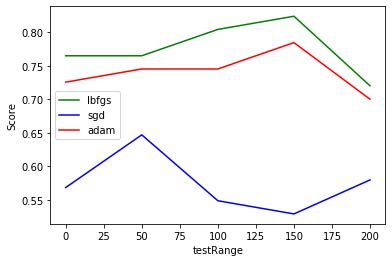

In [49]:
%matplotlib inline
plt.xlabel('testRange')
plt.ylabel('Score')
plt.plot(testRange,lbfgsScoreList,color='green',label='lbfgs')
plt.plot(testRange,sgdScoreList,color='blue',label='sgd')
plt.plot(testRange,adamScoreList,color='red',label='adam')
plt.legend() 

so we defintely use lbfgs

In [34]:
#use lbfgs this time
begin=50
Testsize=50
print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
#clf_MLP_log=MLPClassifier(hidden_layer_sizes=[1],activation='logistic',solver='sgd',random_state=3)#use the  rbf kernel function
clf_identity=MLPClassifier(hidden_layer_sizes=[1],activation='identity',solver='lbfgs',random_state=3,max_iter=10000)
clf_identity.fit(X,y)
score_identity=clf_identity.score(Xtest,ytest)
print("score_identity:%f"%score_identity)
clf_tanh=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='lbfgs',random_state=3,max_iter=10000)
clf_tanh.fit(X,y)
score_tanh=clf_tanh.score(Xtest,ytest)
print("score_tanh:%f"%score_tanh)
clf_relu=MLPClassifier(hidden_layer_sizes=[1],activation='relu',solver='lbfgs',random_state=3,max_iter=10000)
clf_relu.fit(X,y)
score_relu=clf_relu.score(Xtest,ytest)
print("score_relu:%f"%score_relu)


The range of test data is [50,100]:
score_identity:0.764706
score_tanh:0.764706
score_relu:0.745098


In [40]:
testRange=list(range(0,250,50))
Testsize=50
identityScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_identity=MLPClassifier(hidden_layer_sizes=[1],activation='identity',solver='lbfgs',random_state=3,max_iter=10000)
    clf_identity.fit(X,y)
    score_identity=clf_identity.score(Xtest,ytest)
    identityScoreList.append(score_identity)
tanhScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(hidden_layer_sizes=[1],activation='tanh',solver='lbfgs',random_state=3,max_iter=10000)
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    tanhScoreList.append(score_tanh)
reluScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_relu=MLPClassifier(hidden_layer_sizes=[1],activation='relu',solver='lbfgs',random_state=3,max_iter=10000)
    clf_relu.fit(X,y)
    score_relu=clf_relu.score(Xtest,ytest)
    reluScoreList.append(score_relu)

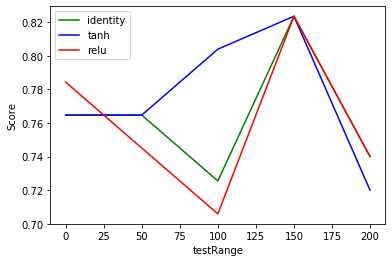

In [46]:
%matplotlib inline
plt.xlabel('testRange')
plt.ylabel('Score')
plt.plot(testRange,identityScoreList,color='green',label='identity')
plt.plot(testRange,tanhScoreList,color='blue',label='tanh')
plt.plot(testRange,reluScoreList,color='red',label='relu')
plt.legend() 

so we decide to use lbfgs this time:

test hidden_layer-size this time:

In [100]:
#use tanh activation this time
#use lbfg solver this time
#test the accuracy when hidden_layer_size changed
#each layer has 10 nodes
testRange=list(range(0,250,50))
Testsize=50
oneLayerScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10))
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    oneLayerScoreList.append(score_tanh)
twoLayerScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10,10))
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    twoLayerScoreList.append(score_tanh)
threeLayerScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10,10,10))
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    threeLayerScoreList.append(score_tanh)
fourLayerScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10,10,10,10))
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    fourLayerScoreList.append(score_tanh)
oneLayer_20nodesScoreList=[]
for begin in testRange:
    #print("\nThe range of test data is [%d,%d]:"%(begin,begin+Testsize))
    X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+Testsize)
    Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+Testsize)
    clf_tanh=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10))
    clf_tanh.fit(X,y)
    score_tanh=clf_tanh.score(Xtest,ytest)
    oneLayer_20nodesScoreList.append(score_tanh)

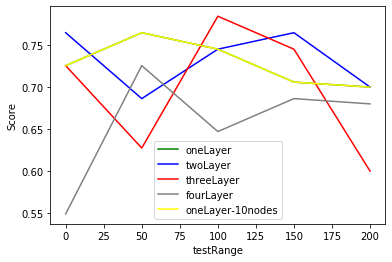

In [101]:
%matplotlib inline
plt.xlabel('testRange')
plt.ylabel('Score')
plt.plot(testRange,oneLayerScoreList,color='green',label='oneLayer')
plt.plot(testRange,twoLayerScoreList,color='blue',label='twoLayer')
plt.plot(testRange,threeLayerScoreList,color='red',label='threeLayer')
plt.plot(testRange,fourLayerScoreList,color='grey',label='fourLayer')
plt.plot(testRange,oneLayer_20nodesScoreList,color='yellow',label='oneLayer-10nodes')
plt.legend() 

In [86]:
def writeTestData(fileName,y):
    file=open(fileName,'w')
    index=250
    file.write("id,target\n")
    for i in y:
        file.write("%d,%d\n"%(index,i))
        index+=1
    file.close()
def loadTestData(fileName):
    dataMat=[]
    inFile=open(fileName)
    inFile.readline()
    for line in inFile.readlines():
        tempMat=[]
        lineArr=line.split(',')
        for element in lineArr[1:]:
            tempMat.append(float(element))
        dataMat.append(tempMat)
    return dataMat

In [94]:
#test the result
part=5
testSize=50
begin=(part-1)*50
X,y=loadDataSet("mostRelated5Features.csv",0,249,begin,begin+testSize)
Xtest,ytest=loadDataSet("mostRelated5Features.csv",begin,begin+testSize)
clf_rbf=MLPClassifier(activation='tanh',solver='lbfgs',random_state=3,max_iter=10000,hidden_layer_sizes=(10))
clf_rbf.fit(X,y)
ypredict=clf_rbf.predict(Xtest)
size=np.size(ypredict)
print("real y,predict y")
for i in range(size):
    print(ytest[i],",",ypredict[i])

real y,predict y
1.0 , 1.0
0.0 , 0.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 0.0
0.0 , 1.0
1.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 1.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
0.0 , 1.0
1.0 , 0.0
1.0 , 1.0
0.0 , 1.0
1.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 0.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
1.0 , 1.0
0.0 , 0.0
0.0 , 1.0
1.0 , 1.0
1.0 , 0.0
0.0 , 1.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
0.0 , 0.0
1.0 , 0.0
0.0 , 1.0


In [95]:
XfinalTest=loadTestData('testSelect5features.csv')
yfinalTest=clf_rbf.predict(XfinalTest)
writeTestData("submissionMLP_part5_5features.csv",yfinalTest)